In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [34]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [38]:
# Model implementation
class Kmeans:

    def __init__(self, K, max_iters = 100 ,plot_steps=False):

        self.K = K
        self.max_iters = max_iters
        self.plot_steps=plot_steps
        self.idx = None
        self.centroids=None

    def compute_centroids(self,X, idx, K):

        m, n = X.shape
        centroids = np.zeros((K, n))
        
        for i in range(K):
            centroids[i] = np.mean(X[idx == i], axis=0)        
        return centroids
    
    def find_closest_centroids(self,X, centroids):

        K = centroids.shape[0]
        idx = np.zeros(X.shape[0], dtype=int)

        for e in range(X.shape[0]):
            minimum = -1
            for i in range(K):
                dist = np.linalg.norm(X[e]- centroids[i])
                if (minimum < 0 or dist < minimum ) :
                    minimum = dist
                    idx[e]= i
                            
        return idx
    def is_converged(self, centroids_old, centroids):
        if np.allclose(centroids_old, centroids):
            return True
        else:
            return False
    
    def plot(self):
        
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.idx, cmap='viridis')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=200, marker='x', c='red')
        plt.title('K-means Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()


    def predict(self, X):
       
        self.X = X
        self.m, self.n = X.shape

        #initialize
        randidx = np.random.permutation(X.shape[0])
        # Take the first K examples as centroids
        self.centroids = X[randidx[:self.K]]



        for _ in range(self.max_iters):

            self.idx = self.find_closest_centroids(self.X, self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            old_centroids = self.centroids
            self.centroids = self.compute_centroids(self.X, self.idx, self.K)


            if self.is_converged(old_centroids, self.centroids):
                break

            
            if self.plot_steps:
                self.plot()



    

(500, 2)
4


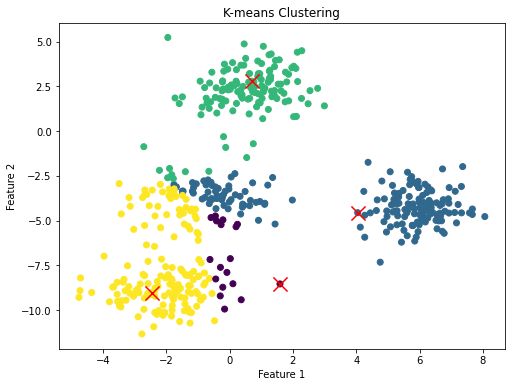

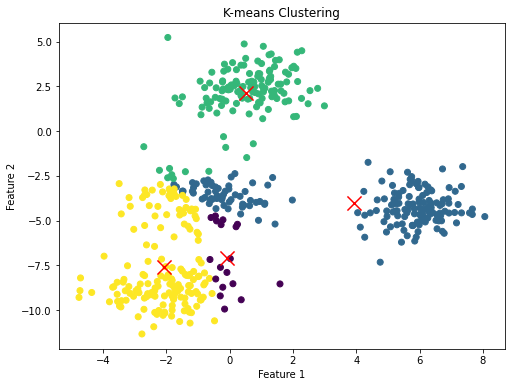

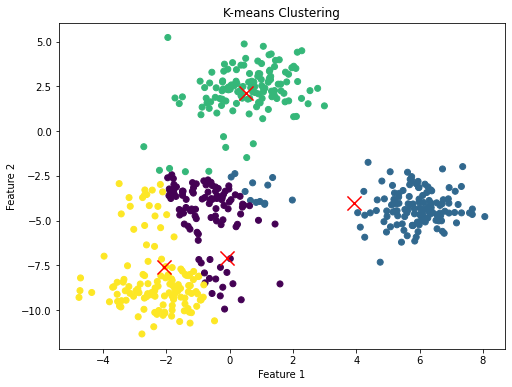

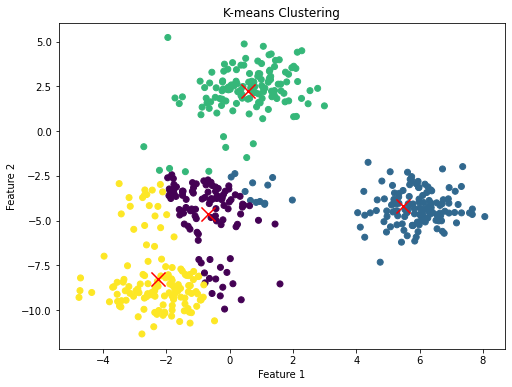

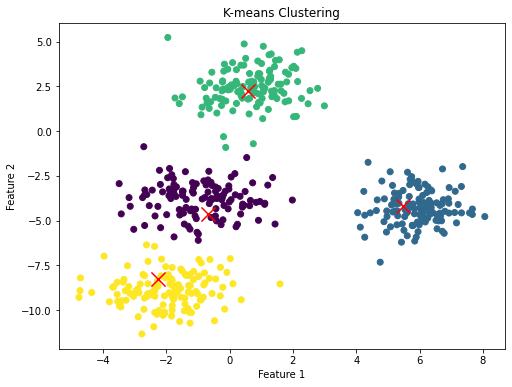

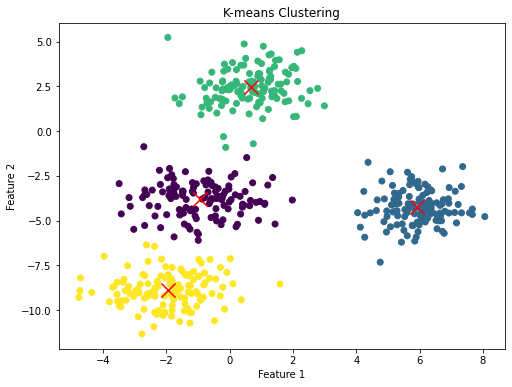

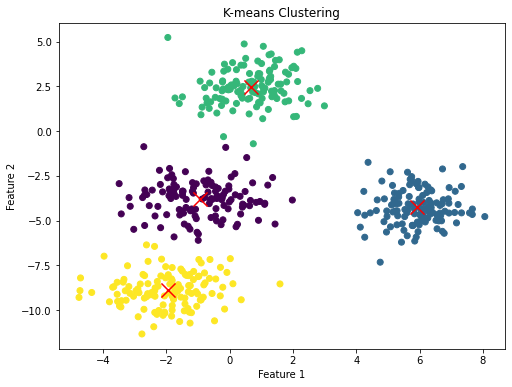

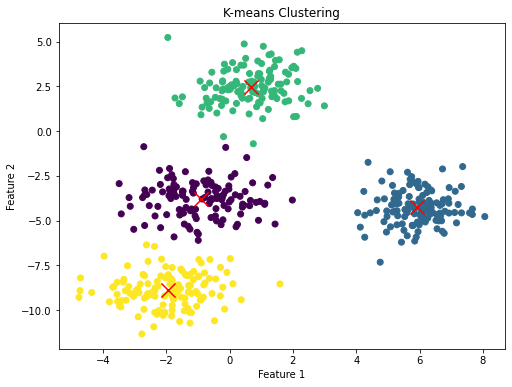

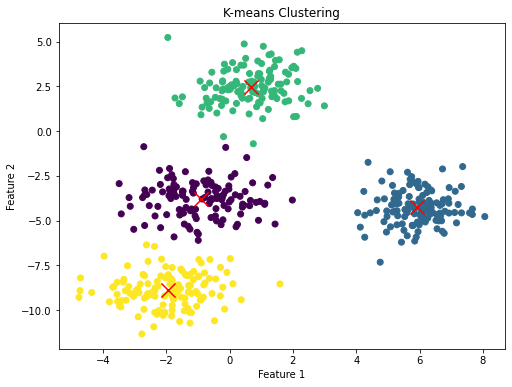

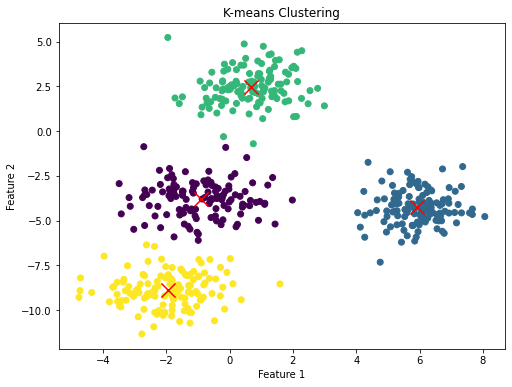

In [39]:
#testing
np.random.seed(42)

X, y = make_blobs(
    centers=4, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = Kmeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()